<a href="https://colab.research.google.com/github/palakagl/CapstoneProject/blob/main/Insurance_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square errror  (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.


In [1]:
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 79 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


In [2]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import io
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import catboost as cb
import shap
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


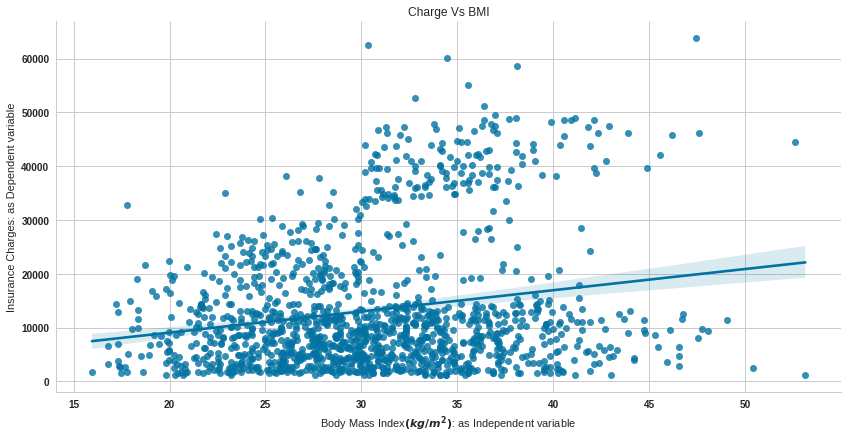

In [6]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Body Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Apparently, we have no missing values on our data, so we’re good to go! The average, medical cost is USD 13,270 with a median value of USD 9382. The respondents’ gender and region of origin is evenly distributed, having age ranging from 18 to 64 years old. Non-smokers outnumber smokers 4 to 1.

the hypothesis function looks like

hθ(xi)=θ0+θ1age+θ2sex+θ3bmi+θ4children+θ5smoker+θ6region

<Figure size 864x288 with 0 Axes>

Text(0.5, 1.0, 'Missing value in the dataset')

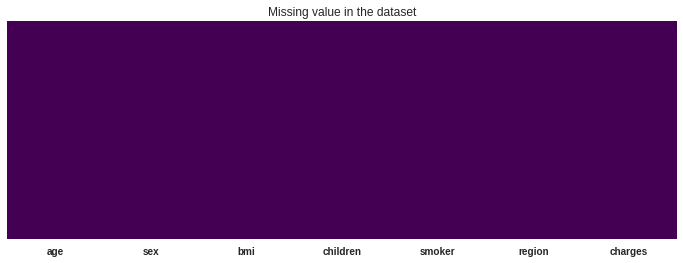

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

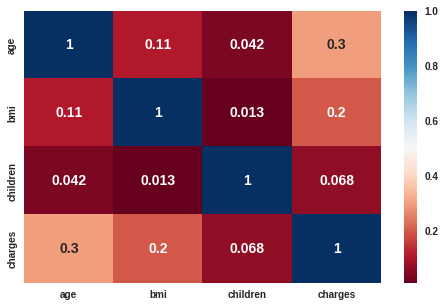

In [9]:
corr = df.corr()
sns.heatmap(corr, cmap = 'RdBu', annot= True)

We can see that age has the highest correlation with charges amongst our numeric variables. Another observation we can make from this plot is that none of our numeric values is highly correlated with each other, so multicollinearity wouldn’t be a problem

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


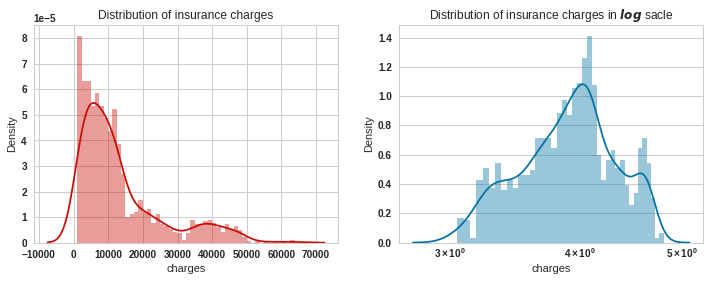

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

Text(0.5, 1.0, 'Violin plot of Charges vs sex')

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

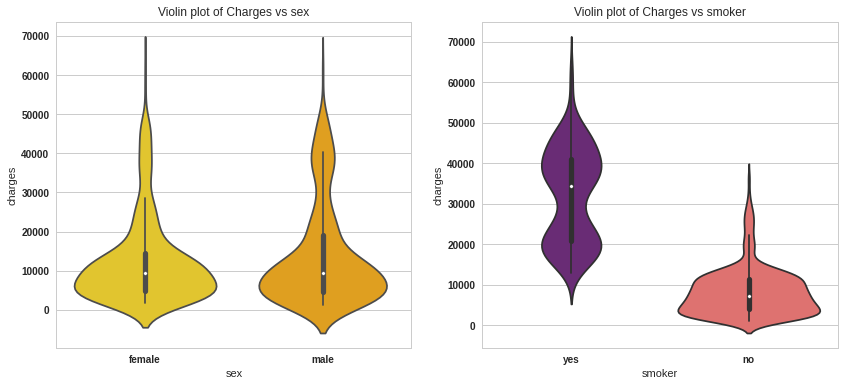

In [11]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

we can see that there is no obvious pattern between gender and premium charged. On the other hand, the same cannot be said with smoking status. It can be clearly observed that smokers have a higher premium charges.

<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Box plot of charges vs children')

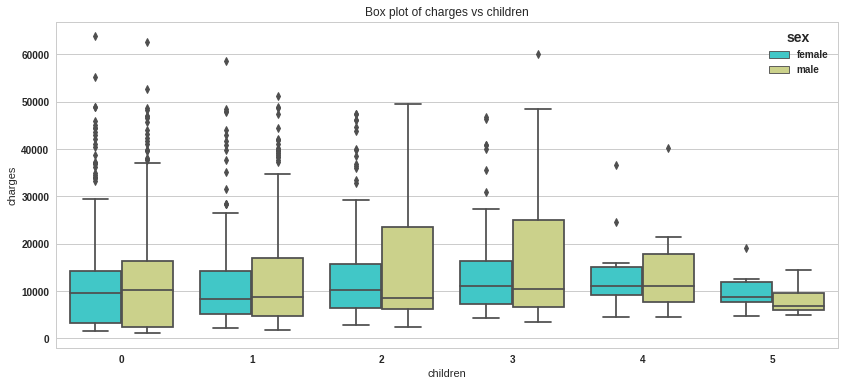

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Violin plot of charges vs children')

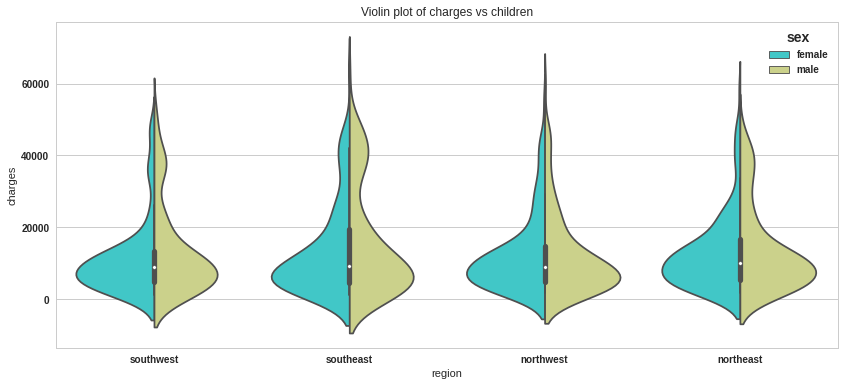

In [13]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children')

Based from the plot above, we can see that region of origin doesn’t have much impact with the amount of premimum charged

Text(0.5, 1.0, 'Scatter plot of Charges vs age')

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

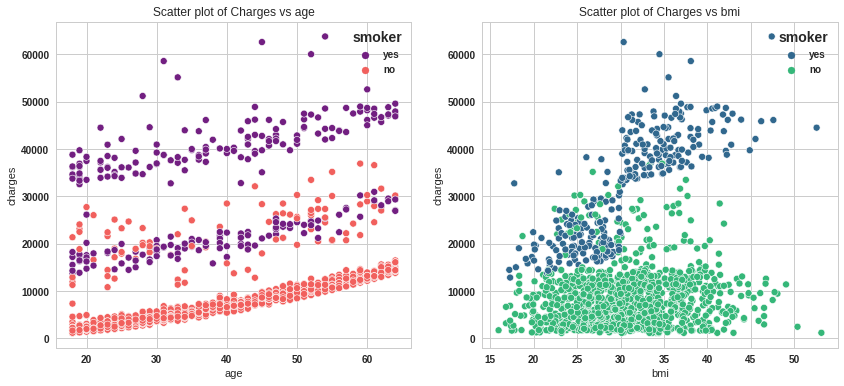

In [14]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png')

In [15]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
                           columns = categorical_columns, drop_first =False, dtype='int8')
df_encode.head(10)

,age,bmi,charges,OHE_female,OHE_male,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,1,0,0
5,31,25.740,3756.62160,1,0,1,0,0,0,0,0,1,0,0,0,1,0
6,46,33.440,8240.58960,1,0,0,1,0,0,0,0,1,0,0,0,1,0
7,37,27.740,7281.50560,1,0,0,0,0,1,0,0,1,0,0,1,0,0
8,37,29.830,6406.41070,0,1,0,0,1,0,0,0,1,0,1,0,0,0
9,60,25.840,28923.13692,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [16]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_female' 'OHE_male' 'OHE_0' 'OHE_1' 'OHE_2'
 'OHE_3' 'OHE_4' 'OHE_5' 'OHE_no' 'OHE_yes' 'OHE_northeast'
 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 17)


In [17]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

In [19]:
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [20]:
X_train.head(5)
y_train.head(5)
X_test.head(5)
y_test.head(5)

,age,bmi,OHE_female,OHE_male,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
923,34,35.815,0,1,1,0,0,0,0,0,1,0,0,1,0,0
1121,46,38.170,0,1,0,0,1,0,0,0,1,0,0,0,1,0
713,20,40.470,0,1,1,0,0,0,0,0,1,0,1,0,0,0
552,62,21.400,0,1,1,0,0,0,0,0,1,0,0,0,0,1
738,23,31.730,0,1,0,0,0,1,0,0,0,1,1,0,0,0


923      8.371106
1121     9.029677
713      7.593099
552      9.469401
738     10.496513
Name: charges, dtype: float64

,age,bmi,OHE_female,OHE_male,OHE_0,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
918,61,28.200,1,0,1,0,0,0,0,0,1,0,0,0,0,1
755,31,27.645,0,1,0,0,1,0,0,0,1,0,1,0,0,0
207,35,27.740,0,1,0,0,1,0,0,0,0,1,1,0,0,0
520,50,27.360,1,0,1,0,0,0,0,0,1,0,1,0,0,0
695,26,40.185,1,0,1,0,0,0,0,0,1,0,0,1,0,0


918     9.475924
755     8.523428
207     9.951520
520    10.152555
695     8.071295
Name: charges, dtype: float64

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
# print the intercept
print(model.intercept_)

7.992518517964598


In [23]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
age,0.033134
bmi,0.013517
OHE_female,0.033884
OHE_male,-0.033884
OHE_0,-0.275973
OHE_1,-0.126516
OHE_2,-0.003054
OHE_3,-0.031878
OHE_4,0.247365
OHE_5,0.190057


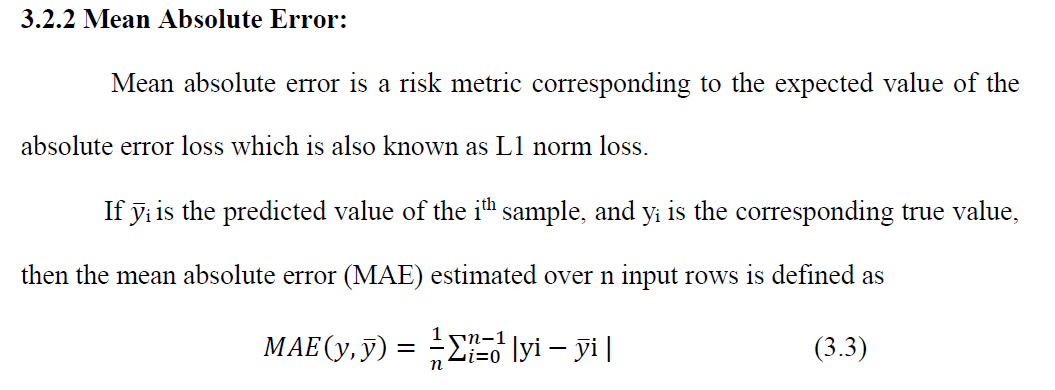

In [24]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
msa = mean_absolute_percentage_error(y_test, predictions)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.7796
Explained Variance Score: 0.7796
Mean Square Error: 0.1873
Mean Absolute Percentage Error: 0.03158956824625175


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


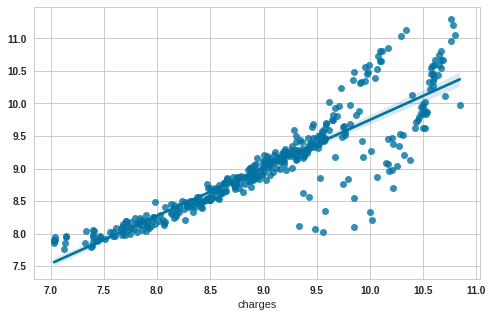

In [25]:
sns.regplot(y_test,predictions)

In [26]:
x_train_new = sm.add_constant(X_train)
x_test_new = sm.add_constant(X_test)

#random.seed(434)
model_ols = sm.OLS(y_train,x_train_new)
model_ols = model_ols.fit()
print ("\n \n",model_ols.summary())


 
                             OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     249.6
Date:                Mon, 30 May 2022   Prob (F-statistic):          8.08e-280
Time:                        17:30:23   Log-Likelihood:                -569.80
No. Observations:                 936   AIC:                             1166.
Df Residuals:                     923   BIC:                             1229.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3072      0.036     90

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [27]:
y_pred_new = model_ols.predict(x_test_new)
mse = mean_squared_error(y_test, y_pred_new)
evs = explained_variance_score(y_test, y_pred_new)
r2 = r2_score(y_test, y_pred_new)
msa = mean_absolute_percentage_error(y_test, y_pred_new)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.7796
Explained Variance Score: 0.7796
Mean Square Error: 0.1873
Mean Absolute Percentage Error: 0.03158956824625187


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


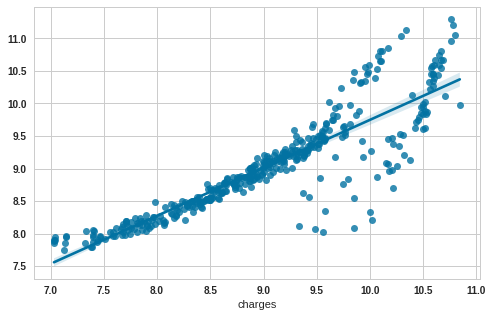

In [28]:
sns.regplot(y_test,y_pred_new)

In [29]:
print ("\nVariance Inflation Factor")
cnames = X_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
age 1.023
bmi 1.113
OHE_female inf
OHE_male inf
OHE_0 inf
OHE_1 inf
OHE_2 inf
OHE_3 inf
OHE_4 inf
OHE_5 inf
OHE_no inf
OHE_yes inf
OHE_northeast inf
OHE_northwest inf
OHE_southeast inf
OHE_southwest inf


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
divide by zero encountered in double_scalars


## Decision Tree regression model

In [30]:
# Decision Tree regression model
regr_dt_1 = DecisionTreeRegressor(max_depth=3)
regr_dt_2 = DecisionTreeRegressor(max_depth=4)

In [31]:
regr_dt_1 = regr_dt_1.fit(X_train, y_train)
regr_dt_2 = regr_dt_2.fit(X_train, y_train)

In [32]:
# Predict
y_dt_pred_1 = regr_dt_1.predict(X_test)
y_dt_pred_2 = regr_dt_2.predict(X_test)

In [33]:
# Plot the results
mse = mean_squared_error(y_test, y_dt_pred_1)
evs = explained_variance_score(y_test, y_dt_pred_1)
r2 = r2_score(y_test, y_dt_pred_1)
msa = mean_absolute_percentage_error(y_test, y_dt_pred_1)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.807
Explained Variance Score: 0.8072
Mean Square Error: 0.164
Mean Absolute Percentage Error: 0.029228669865907792



Prediction Error Plot


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


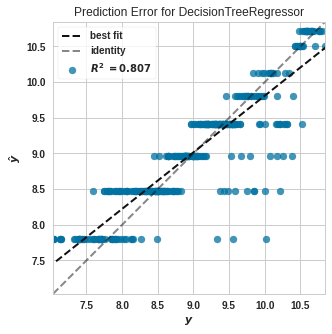

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d6cbdfa10>,
                estimator=DecisionTreeRegressor(max_depth=3))


In [34]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(regr_dt_1, X_train, y_train, X_test, y_test))

In [35]:
mse = mean_squared_error(y_test, y_dt_pred_2)
evs = explained_variance_score(y_test, y_dt_pred_2)
r2 = r2_score(y_test, y_dt_pred_2)
msa = mean_absolute_percentage_error(y_test, y_dt_pred_2)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.8267
Explained Variance Score: 0.8274
Mean Square Error: 0.1473
Mean Absolute Percentage Error: 0.026736358315126794



Prediction Error Plot


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


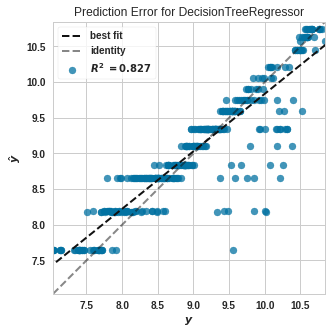

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d6cb1cbd0>,
                estimator=DecisionTreeRegressor(max_depth=4))


In [36]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(regr_dt_2, X_train, y_train, X_test, y_test))

## Random Forest Regression Model

In [37]:
## Define Grid 
grid = { 
    'n_estimators': [100,150,200,250,300],
    'max_depth' : [3,4,5,6],
    'random_state' : [11]
}

## Grid Search function
regr_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 10)
regr_rf.fit(X_train, y_train)
print(regr_rf.best_params_)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'random_state': [11]})

{'max_depth': 4, 'n_estimators': 100, 'random_state': 11}


In [38]:
# Predict
y_rf_pred = regr_rf.predict(X_test)

In [39]:
# Plot the results
mse = mean_squared_error(y_test, y_rf_pred)
evs = explained_variance_score(y_test, y_rf_pred)
r2 = r2_score(y_test, y_rf_pred)
msa = mean_absolute_percentage_error(y_test, y_rf_pred)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.8356
Explained Variance Score: 0.836
Mean Square Error: 0.1397
Mean Absolute Percentage Error: 0.024577931747136916



Prediction Error Plot


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


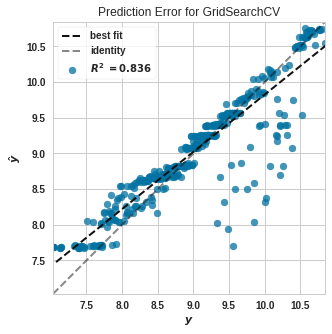

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d6d10a150>,
                estimator=GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                                       param_grid={'max_depth': [3, 4, 5, 6],
                                                   'n_estimators': [100, 150,
                                                                    200, 250,
                                                                    300],
                                                   'random_state': [11]}))


In [40]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(regr_rf, X_train, y_train, X_test, y_test))

## XG Boost Regression Model

In [47]:
## Define Grid 
grid = { 
    'n_estimators': [40, 50, 60, 70],
    'max_depth' : [2,3,4,5],
    'learning_rate' : [0.93,0.95, 0.97, 0.1],
    'random_state' : [11]
}

## Grid Search function
regr_xgb = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=grid, cv= 10)
regr_xgb.fit(X_train, y_train)
print(regr_xgb.best_params_)

[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=10, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.93, 0.95, 0.97, 0.1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [40, 50, 60, 70],
                         'random_state': [11]})

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70, 'random_state': 11}


In [48]:
# Predict
y_xgb_pred = regr_xgb.predict(X_test)

In [49]:
# Plot the results
mse = mean_squared_error(y_test, y_xgb_pred)
evs = explained_variance_score(y_test, y_xgb_pred)
r2 = r2_score(y_test, y_xgb_pred)
msa = mean_absolute_percentage_error(y_test, y_xgb_pred)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.8494
Explained Variance Score: 0.8496
Mean Square Error: 0.128
Mean Absolute Percentage Error: 0.022525356786416442



Prediction Error Plot


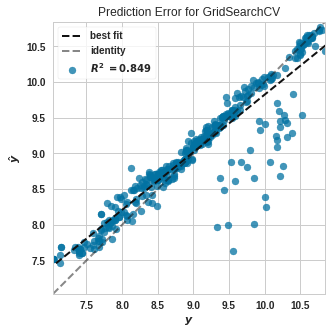

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d6ca60f50>,
                estimator=GridSearchCV(cv=10, estimator=XGBRegressor(),
                                       param_grid={'learning_rate': [0.93, 0.95,
                                                                     0.97,
                                                                     0.1],
                                                   'max_depth': [2, 3, 4, 5],
                                                   'n_estimators': [40, 50, 60,
                                                                    70],
                                                   'random_state': [11]}))


In [50]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(regr_xgb, X_train, y_train, X_test, y_test))

In [51]:
regr_xgb_bp = xgb.XGBRegressor(max_depth= 3,learning_rate=0.1, n_estimators=70, random_state=11)
regr_xgb_bp.fit(X_train, y_train)

[17:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=70, random_state=11)

In [52]:
regr_xgb_bp_pred = regr_xgb_bp.predict(X_test)

In [53]:
# Plot the results
mse = mean_squared_error(y_test, regr_xgb_bp_pred)
evs = explained_variance_score(y_test, regr_xgb_bp_pred)
r2 = r2_score(y_test, regr_xgb_bp_pred)
msa = mean_absolute_percentage_error(y_test, regr_xgb_bp_pred)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.8494
Explained Variance Score: 0.8496
Mean Square Error: 0.128
Mean Absolute Percentage Error: 0.022525356786416442


In [54]:
explainer = shap.TreeExplainer(regr_xgb_bp)
shap_values = explainer.shap_values(X_test)

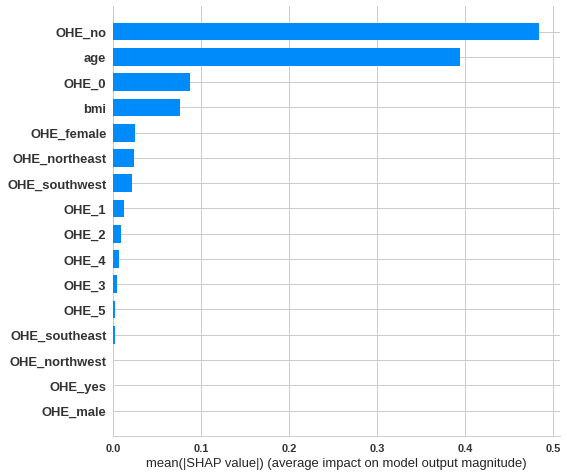

In [55]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

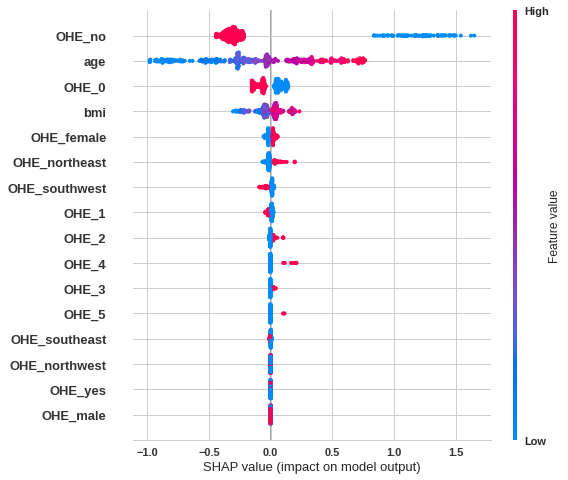

In [56]:
shap.summary_plot(shap_values, X_test)

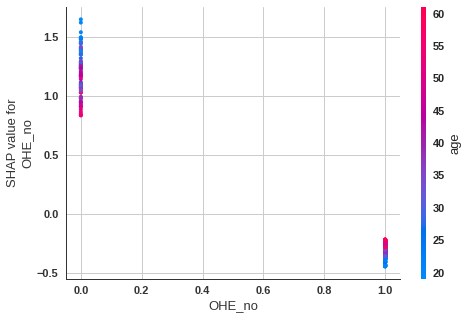

In [58]:
shap.dependence_plot("OHE_no", shap_values, X_test)

## CAT Boost Regression Model

In [59]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [72]:
regr_cat = cb.CatBoostRegressor(loss_function='RMSE')

In [73]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 3, 4, 5, 6],
        'l2_leaf_reg': [0.2, 0.5, 1, 3],
        'random_state' : [42] 
        }
regr_cat.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
61:	learn: 0.3233149	test: 0.4838389	best: 0.4838389 (61)	total: 53.3ms	remaining: 119ms
62:	learn: 0.3226994	test: 0.4830697	best: 0.4830697 (62)	total: 54.1ms	remaining: 118ms
63:	learn: 0.3220011	test: 0.4828077	best: 0.4828077 (63)	total: 55ms	remaining: 117ms
64:	learn: 0.3209801	test: 0.4829986	best: 0.4828077 (63)	total: 55.9ms	remaining: 116ms
65:	learn: 0.3205670	test: 0.4839730	best: 0.4828077 (63)	total: 56.7ms	remaining: 115ms
66:	learn: 0.3195932	test: 0.4832892	best: 0.4828077 (63)	total: 57.5ms	remaining: 114ms
67:	learn: 0.3185620	test: 0.4837080	best: 0.4828077 (63)	total: 58.4ms	remaining: 113ms
68:	learn: 0.3168112	test: 0.4842831	best: 0.4828077 (63)	total: 59.2ms	remaining: 112ms
69:	learn: 0.3160440	test: 0.4845652	best: 0.4828077 (63)	total: 60ms	remaining: 111ms
70:	learn: 0.3147087	test: 0.4849521	best: 0.4828077 (63)	total: 60.9ms	remaining: 111ms
71:	learn: 0.3141993	test: 0.4844167	best: 0.4828077 (63)	total

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [75]:
regr_cat_pred = regr_cat.predict(X_test)

In [76]:
# Plot the results
mse = mean_squared_error(y_test, regr_cat_pred)
evs = explained_variance_score(y_test, regr_cat_pred)
r2 = r2_score(y_test, regr_cat_pred)
msa = mean_absolute_percentage_error(y_test, regr_cat_pred)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.8505
Explained Variance Score: 0.8507
Mean Square Error: 0.127
Mean Absolute Percentage Error: 0.022297574833033077


In [ ]:
regr_cat_bp = cb.CatBoostRegressor(max_depth= 4,learning_rate=0.1, n_estimators=100, l2_leaf_reg=0.2, random_state=42)
regr_cat_bp.fit(X_train, y_train)

In [78]:
regr_cat_bp_pred = regr_cat_bp.predict(X_test)

In [79]:
# Plot the results
mse = mean_squared_error(y_test, regr_cat_bp_pred)
evs = explained_variance_score(y_test, regr_cat_bp_pred)
r2 = r2_score(y_test, regr_cat_bp_pred)
msa = mean_absolute_percentage_error(y_test, regr_cat_bp_pred)
print("R square:",round(r2, 4))
print("Explained Variance Score:",round(evs, 4))
print("Mean Square Error:",round(mse,4))
print("Mean Absolute Percentage Error:",msa)

R square: 0.8505
Explained Variance Score: 0.8507
Mean Square Error: 0.127
Mean Absolute Percentage Error: 0.022297574833033077


In [81]:
explainer = shap.TreeExplainer(regr_cat_bp)
shap_values = explainer.shap_values(X_test)

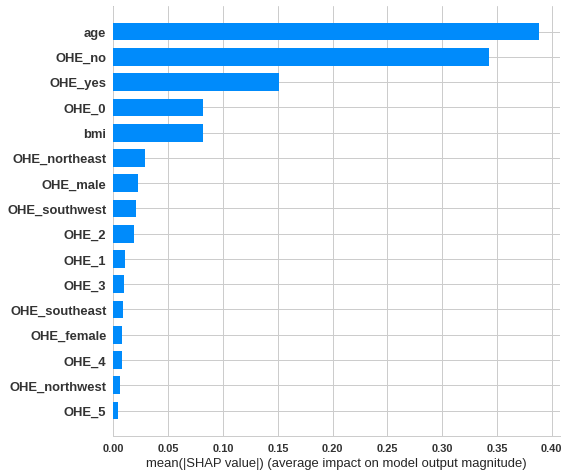

In [82]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

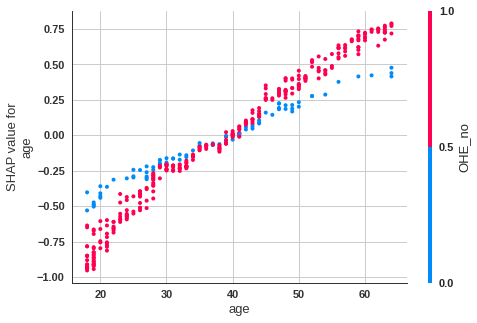

In [83]:
shap.dependence_plot("age", shap_values, X_test)

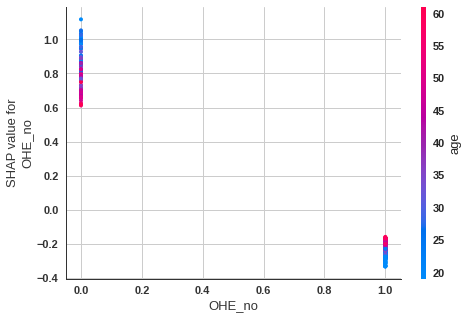

In [84]:
shap.dependence_plot("OHE_no", shap_values, X_test)

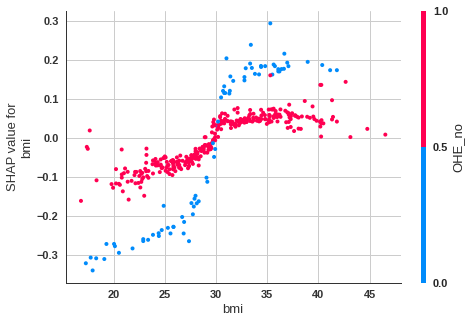

In [85]:
shap.dependence_plot("bmi", shap_values, X_test)